# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# <a name="contents">Задачи исследования</a>
## [1. Осмотр данных](#stage_1)
    - посмотрим начало и конец датасета
    - сделаем предварительные выводы
    - поищем аномалии


## [2. Обработка данных](#stage_2)
    - найти и обработать пропуски
    - заменить некорректные типы данных
    - удалить дубликаты
    - подсчитать и добавить цену квадратного метра
    - добавить день недели, месяц и год объявления
    - добавить этаж - первый, последний, другой
    - добавить соотношение жилой и общей площади, а также отношение площади кухни к общей


## [3. Ответы на вопросы](#stage_3)
    - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики
    и постройте графики. Сколько обычно длится процесс продажи?

    - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

    - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа
    комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

    - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом
    объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

    - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите
    самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов
    с ценой по всем предложениям и объявлениям в вашей выборке.

    - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки.
    Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.


## [4. Результаты исследования](#stage_4)
    - Общие выводы
    - Рекомендации

<a name="stage_1"></a>
### Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/trisha00001/EDA/main/real_estate_data.csv', sep = '\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.shape

(23699, 22)

В файле 23699 строк  и 22 столбца. 2 столбца - типа bool, 14 -  float64,
3 - int64 и три переменных - категориальные (object). В столбцах есть пропуски, на них мы обратим внимание на втором шаге.


In [5]:
df.dtypes

,0
total_images,int64
last_price,float64
total_area,float64
first_day_exposition,object
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
is_apartment,object


- first_day_exposition - object - должен быть тип datetime
- floors_total - должен быть тип int, т.к. количество этажей - целое значение
- is_apartment - должен быть тип bool
- parks_around3000 - тип должен быть int
- ponds_around3000 - тип должен быть int
- days_exposition - тип должен быть int

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


- total_images - максимамльное значение 50 (обратить внимание)
- total_area максимамльное значение 900 кв. м. обратить внимание. Данные скошены вправо
- rooms максимамльное значение 19. обратить внимание. Данные скошены вправо
Есть данные которые распределены неравномерно, по видимому есть роскошные квартиры с большой площадью и ценой.


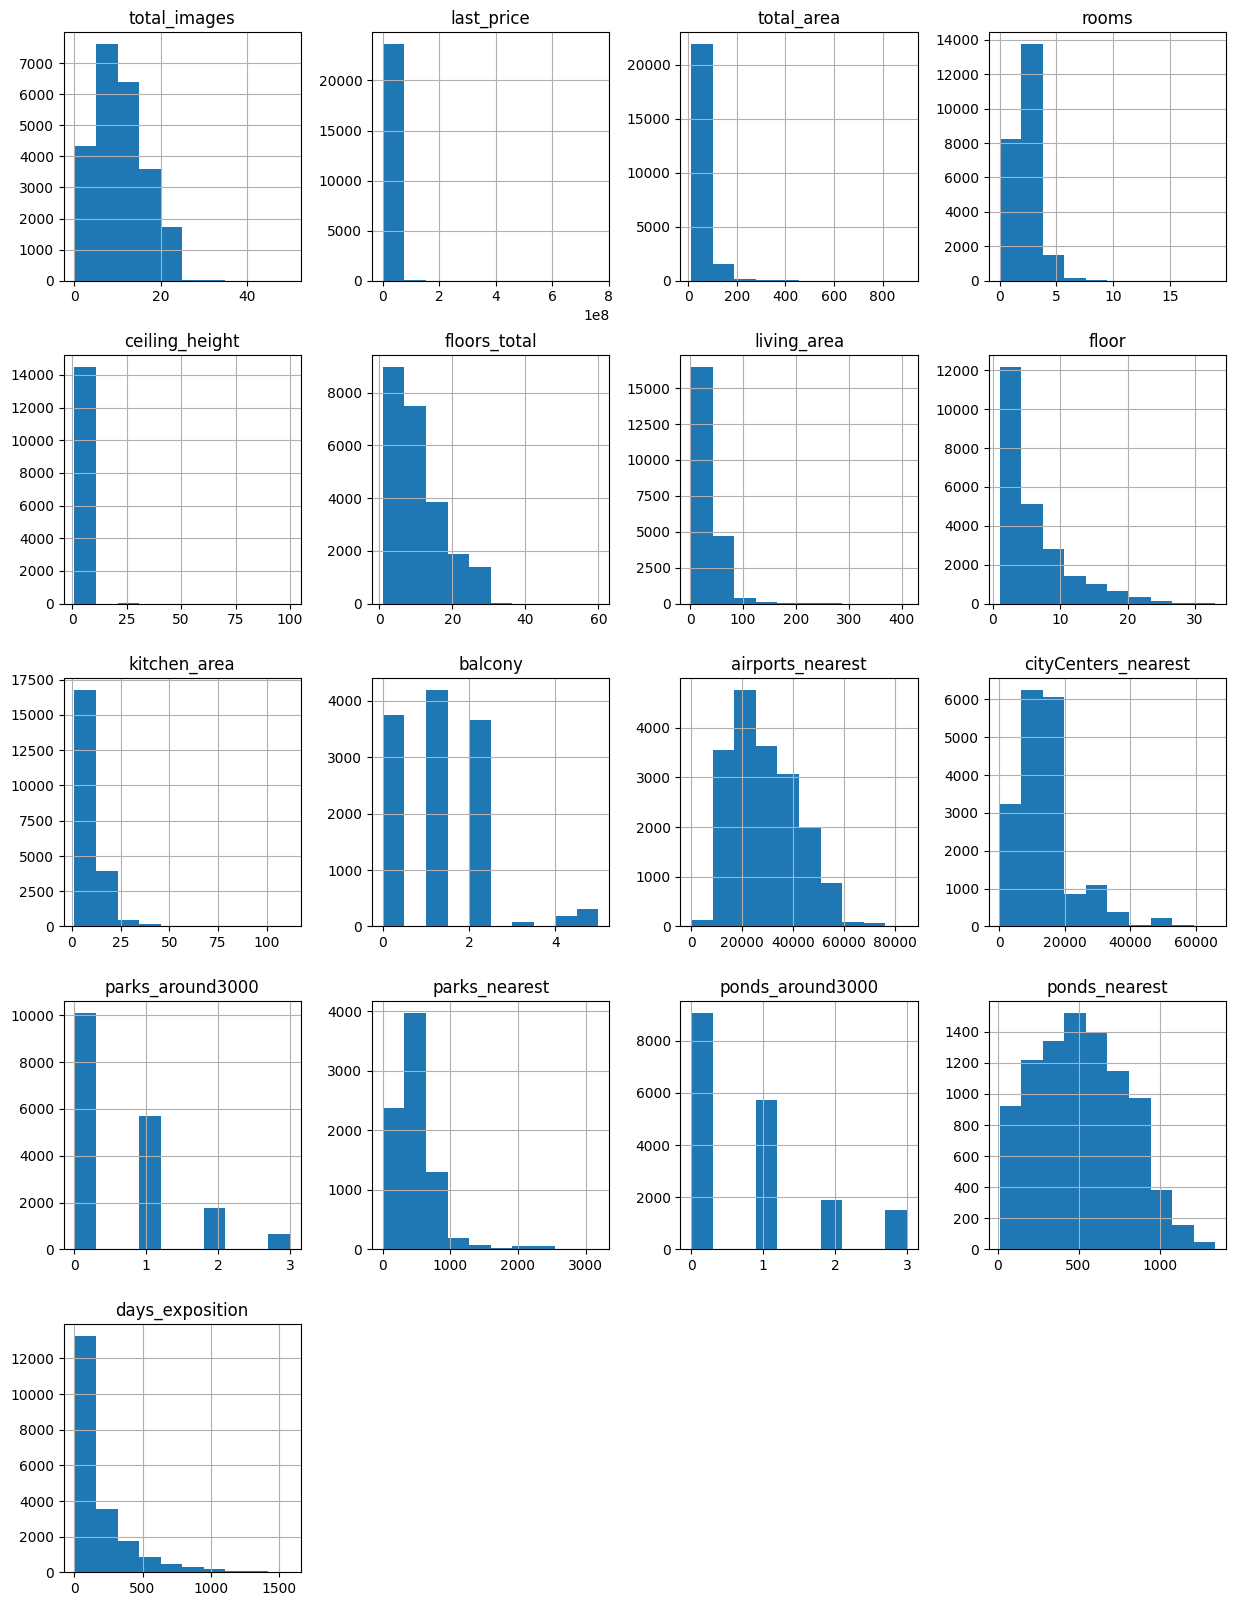

In [8]:
df.hist(figsize=(15, 20));

Обратить внимание на признаки у которых есть 0 значение.

In [9]:
df.duplicated().sum()

np.int64(0)

### Предобработка данных

In [10]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Переименуем столбцы

In [11]:
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [12]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [13]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [14]:
df['locality_name'] = df['locality_name'].str.lower()

Проблемы с буквой ё

In [15]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [16]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа')


In [17]:
df['locality_name'].unique().tolist()

['санкт-петербург',
 'поселок шушары',
 'поселок городского типа янино-1',
 'поселок парголово',
 'поселок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'деревня федоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'поселок металлострой',
 'поселок городского типа лебяжье',
 'поселок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'поселок аннино',
 'поселок городского типа ефимовский',
 'поселок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'поселок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'поселок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 'мурино',
 'шл

Посмотрим пропущенные значение в процентном соотношение

In [18]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['Пропущенные значения', 'Процент'])
MissingData

,Пропущенные значения,Процент
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
city_centers_nearest,5519,23.287902
parks_around3000,5518,23.283683
ponds_around3000,5518,23.283683
days_exposition,3181,13.422507


Переведем столбец с датой в формат даты без времени, т.к. время не указано

In [19]:

df['first_day_exposition'] = df['first_day_exposition'].astype("datetime64[ns]")

Изменим цену на тип int для удобства просмотра

In [20]:
df['last_price'] = df['last_price'].astype('int')

Заменим пропуски в days_exposition и заменим тип данных

In [21]:

df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

Удалим столбцы, которые не заполнены более чем на 50 %

In [22]:
del df['parks_nearest']
del df['ponds_nearest']
del df['is_apartment']
#del df['ceiling_height']


Заменим пропуски в balcony на 0 и изменим тип данных на int

In [23]:


df['balcony'].value_counts()
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

Удалим строки

In [24]:

df = df.dropna(subset=['locality_name'])

In [25]:
df= df.dropna(subset=['floors_total'])

 Заменяем пустые значения жилой площади и площади кухни

In [26]:

living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0

In [27]:


df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)

Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0

In [28]:

df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)


Посмотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть, медиана от среднего отличается не сильно из-за этих выбросов во всей выборке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
14382,9,1700000,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,False,8.000000,1,поселок новый свет,NaN,NaN,0,0,206
18545,6,3750000,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,False,7.528208,0,санкт-петербург,27054.0,8033.0,1,0,12
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,False,5.700000,0,кронштадт,68923.0,50649.0,1,2,0
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,False,5.200000,0,санкт-петербург,11647.0,13581.0,0,0,0
11285,0,1950000,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,False,9.000000,2,луга,NaN,NaN,0,0,18
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,9.664118,2,гатчина,NaN,NaN,0,0,259
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,False,7.000000,1,санкт-петербург,12016.0,13256.0,1,1,181
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,False,7.000000,2,санкт-петербург,28981.0,10912.0,1,0,267
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,False,9.000000,2,деревня мины,NaN,NaN,0,0,540
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,True,4.376865,2,поселок мурино,NaN,NaN,0,0,28


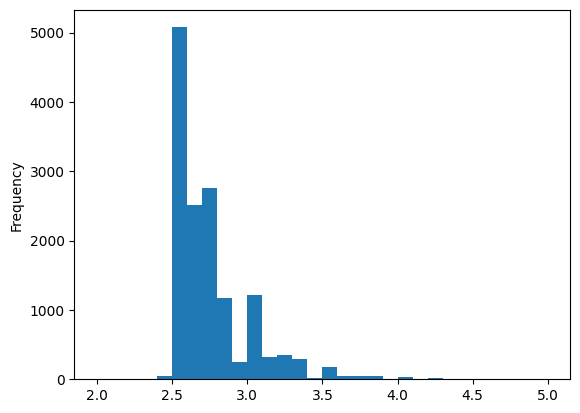

In [29]:


df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
df['ceiling_height'].value_counts()
df['ceiling_height'].describe()
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)


Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету

In [30]:
df


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,2,0
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,0,81
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,2,558
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,90.816648,9,False,False,27.836861,0,санкт-петербург,28098.0,6800.0,2,3,424
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,1,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,13.830000,0,санкт-петербург,24665.0,4232.0,1,3,0
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.000000,4,False,False,8.500000,0,тосно,NaN,NaN,0,0,45
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,False,9.926730,0,село рождествено,NaN,NaN,0,0,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.837596,12,False,False,23.300000,2,санкт-петербург,39140.0,10364.0,2,3,602


# df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

In [31]:
df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

Заполним пустые значения большим числом

In [32]:
df['city_centers_nearest'] = df['city_centers_nearest']/1000
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(999999)
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
df['airports_nearest'] = df['airports_nearest']/1000
df['airports_nearest'] = df['airports_nearest'].fillna(999999)
df['airports_nearest'] = df['airports_nearest'].astype('int')

In [33]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['Пропущенные значения', 'Процент'])
MissingData

,Пропущенные значения,Процент
ceiling_height,476,2.019945
last_price,0,0.000000
total_images,0,0.000000
total_area,0,0.000000
first_day_exposition,0,0.000000
rooms,0,0.000000
floors_total,0,0.000000
living_area,0,0.000000
floor,0,0.000000
studio,0,0.000000


In [34]:
df.dtypes

,0
total_images,int64
last_price,int64
total_area,float64
first_day_exposition,datetime64[ns]
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
studio,bool


Изменение типов во всех остальных случаях необзодимо, чтобы сэкономить память.

In [35]:
df['floors_total'] =  df['floors_total'].astype('Int8')

In [36]:
# подсчёт явных дубликатов
df.duplicated().sum()

np.int64(0)

**Убирем анамальные значения**

In [37]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    df[col] = quartile_range(df, col)

#### Выводы:

В ходе предобработки данных были:
- заполнены отсутствую значения,
- обработана некачественные названия столбцов
- изменены некорректные типы данных
- убоали нелогичная группировка столбцов между собой
- заменили прыгающий регистр в названии столбцов
- убрази выбросы

### Посчитайте и добавьте в таблицу новые столбцы

посчитаем цену квадратного метра

In [38]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

создадим столбец дня недели

In [39]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [40]:
df['weekday_exposition'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

Создадим столбец месяца

In [41]:
df['month_exposition'] = df['first_day_exposition'].dt.month

Создадим столбец года

In [42]:
df['year_exposition'] = df['first_day_exposition'].dt.year

Напишем функцию категоризации по этажам


In [43]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#категоризуем этажи с помощью функции
df['floor_category'] = df.apply(floor_category, axis = 1)

### Проведите исследовательский анализ данных

Распределение данных нормальное, есть выбросы но они не сильно влияют на данные, по гистограмме кроме распределения нечего больше указать, с помошью describe получил общее представление


In [44]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
total_images,23565.0,9.878421,0.0,6.0,9.0,14.0,50.0,5.681156
last_price,21519.0,4837114.547516,12190.0,3300000.0,4400000.0,5999999.5,11866860.0,2215773.608325
total_area,22326.0,54.319704,12.0,39.4,50.0,65.5,114.2,19.33103
first_day_exposition,23565,2017-11-10 08:59:53.125398016,2014-11-27 00:00:00,2017-05-15 00:00:00,2017-12-12 00:00:00,2018-08-26 00:00:00,2019-05-03 00:00:00,NaN
rooms,23371.0,2.030208,0.0,1.0,2.0,3.0,5.0,0.973563
ceiling_height,21374.0,2.65941,2.25,2.55,2.6,2.75,3.05,0.144202
floors_total,23565.0,10.675875,1.0,5.0,9.0,16.0,60.0,6.594823
living_area,22682.0,31.526984,2.0,18.7,30.0,40.6,76.7,13.752739
floor,23565.0,5.878124,1.0,2.0,4.0,8.0,33.0,4.871485
kitchen_area,22250.0,9.41784,1.3,7.0,9.0,11.0,19.45,3.177523


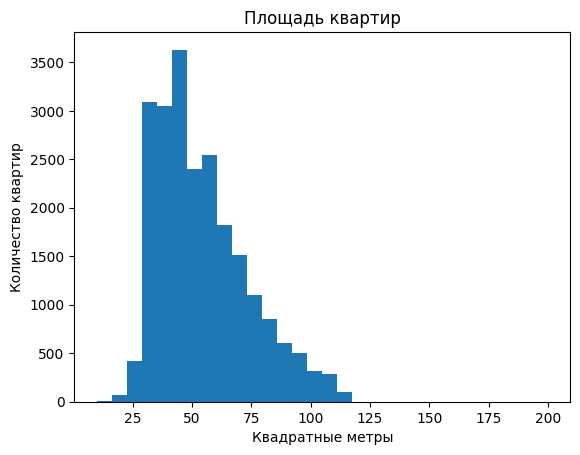

Наибольшие по площади варианты:
20477    114.2
19021    114.2
5978     114.2
4657     114.2
1170     114.2
5853     114.1
8249     114.0
21975    114.0
20443    114.0
14240    114.0
Name: total_area, dtype: float64
count    22326.000000
mean        54.319704
std         19.331030
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64


In [45]:
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['total_area'].sort_values(ascending=False).head(10))
print(df['total_area'].describe())

**"Общая площадь" в нашей выборке колеблется от 12 до 114 $м^{2}$, среднее значение 54$м^{2}$, а медиана 50 $м^{2}$. Распределение данных Гаусса.**

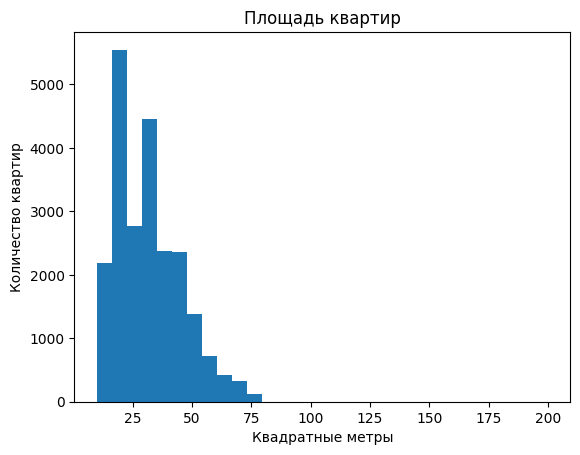

Наибольшие по площади варианты:
8470     76.7000
18109    76.6500
8533     76.5373
14540    76.5373
7091     76.5373
16618    76.5000
8933     76.5000
12604    76.4000
9361     76.4000
7202     76.4000
Name: living_area, dtype: float64
count    22682.000000
mean        31.526984
std         13.752739
min          2.000000
25%         18.700000
50%         30.000000
75%         40.600000
max         76.700000
Name: living_area, dtype: float64


In [46]:
plt.hist(df['living_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['living_area'].sort_values(ascending=False).head(10))
print(df['living_area'].describe())

**"Жилая площадь" в нашей выборке колеблется от 2 до 46 $м^{2}$, среднее значение 32$м^{2}$, а медиана 30 $м^{2}$. Распределение данных Гаусса.  Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры. Элитная недвижимость была удалена.**

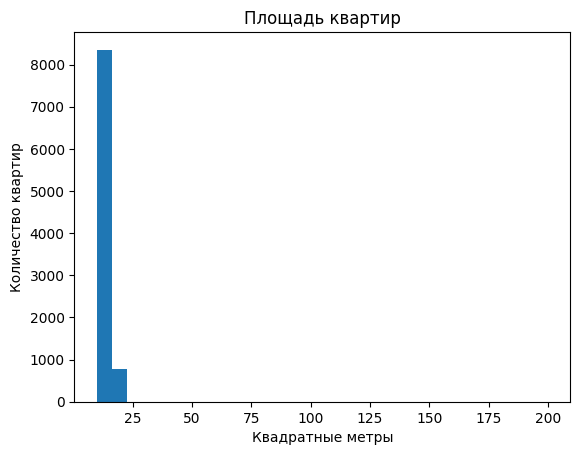

Наибольшие по площади варианты:
9448     19.45000
16505    19.43328
8286     19.42000
6721     19.40000
3056     19.40000
417      19.40000
15365    19.40000
14212    19.40000
9723     19.40000
8901     19.40000
Name: kitchen_area, dtype: float64
count    22250.000000
mean         9.417840
std          3.177523
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.450000
Name: kitchen_area, dtype: float64


In [47]:
plt.hist(df['kitchen_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['kitchen_area'].sort_values(ascending=False).head(10))
print(df['kitchen_area'].describe())

**"Площадь кухни" в нашей выборке колеблется от 1 до 20 $м^{2}$, среднее значение 9$м^{2}$, а медиана 9 $м^{2}$. Распределение данных Гаусса. Максимальные значения могут существовать.**

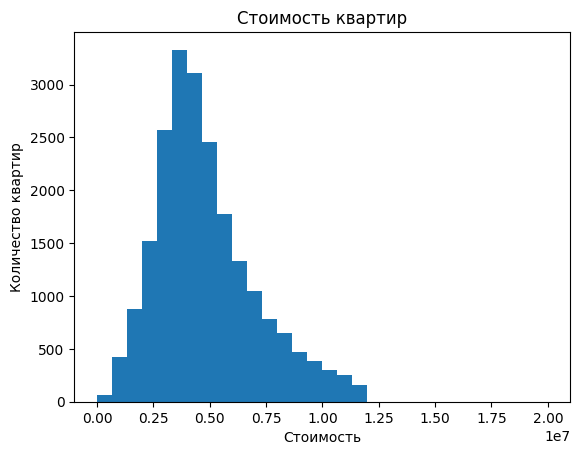

Наибольшие по цене варианты:
3165     11866860.0
21860    11858000.0
12437    11850000.0
10068    11840000.0
19454    11820000.0
20193    11809670.0
22326    11800000.0
14422    11800000.0
2267     11800000.0
3642     11800000.0
Name: last_price, dtype: float64
count    2.151900e+04
mean     4.837115e+06
std      2.215774e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.186686e+07
Name: last_price, dtype: float64


In [48]:
# Работаем со стоимостью
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(10))

print(df['last_price'].describe())

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

с данными все впорядке но значения выводятся в экспоненциальной записи чисел

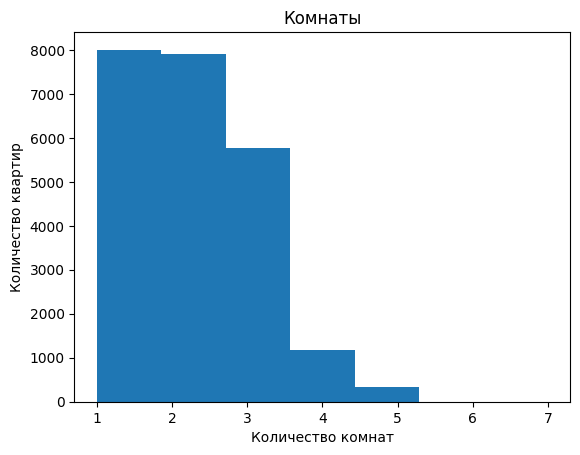

Наибольшие по числу комнат варианты:
22798    5.0
13694    5.0
7515     5.0
7281     5.0
19533    5.0
7289     5.0
7274     5.0
16389    5.0
1738     5.0
1492     5.0
Name: rooms, dtype: float64
count    23371.000000
mean         2.030208
std          0.973563
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


In [49]:
# Работаем с комнатами
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(df['rooms'].sort_values(ascending=False).head(10))
print(df['rooms'].describe())

Количество комнат колеблется от 1 до 5.  Больше всего однокомнатных квартир. В основном квартиры состоят из 1, 2 и 3 комнат.

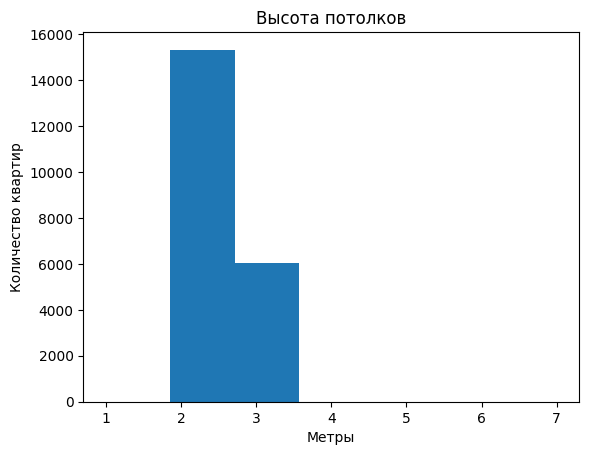

Наибольшие по высоте потолков варианты:
19203    3.05
8584     3.05
16207    3.05
11909    3.05
8006     3.05
7302     3.05
12108    3.05
13375    3.05
19172    3.05
11570    3.05
Name: ceiling_height, dtype: float64
count    21374.000000
mean         2.659410
std          0.144202
min          2.250000
25%          2.550000
50%          2.600000
75%          2.750000
max          3.050000
Name: ceiling_height, dtype: float64


In [50]:
# Работаем с комнатами
plt.hist(df['ceiling_height'], bins=7, range=(1,7))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))
print(df['ceiling_height'].describe())

Большинство вариантов имеют высоту потолков от 2,5 до 2.75 метров. Больше 2.75 метров высота потолков выглядит подозрительно. Высота потолков в среднем составляет 2,65 м, медиана 2,65 м.

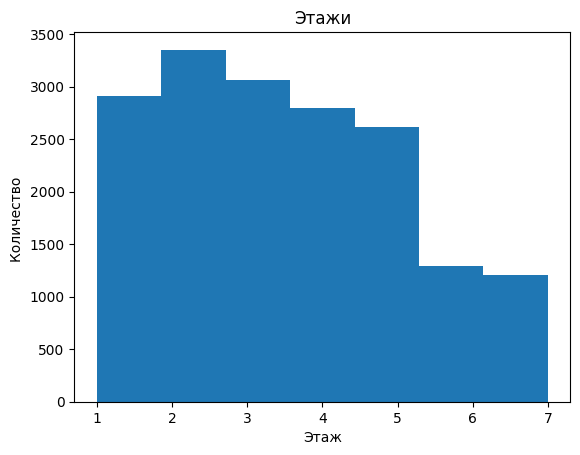

Этажность:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
7711     27
113      27
8496     27
13276    27
Name: floor, dtype: int64
count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [51]:
# Работаем с комнатами
plt.hist(df['floor'], bins=7, range=(1,7))
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество ')
plt.show()
print('Этажность:')
print(df['floor'].sort_values(ascending=False).head(10))
print(df['floor'].describe())


Ничего подозрительного нет. Хотя можно обратить внимание на 33 этаж.

In [52]:
df['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [53]:
df['floor_category'].sort_values().unique()

array(['другой', 'первый', 'последний'], dtype=object)

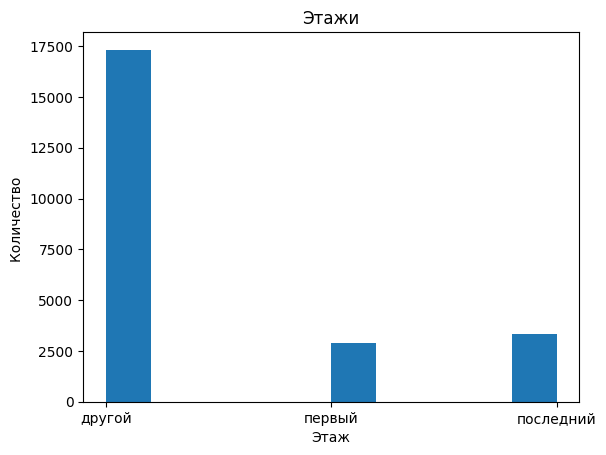

Этажность:
6813     последний
17303    последний
3054     последний
8675     последний
17284    последний
3060     последний
3063     последний
8669     последний
3067     последний
17290    последний
Name: floor_category, dtype: object
count      23565
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object


In [54]:
# Работаем с комнатами
plt.hist(df['floor_category'])
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество ')
plt.show()
print('Этажность:')
print(df['floor_category'].sort_values(ascending=False).head(10))
print(df['floor_category'].describe())

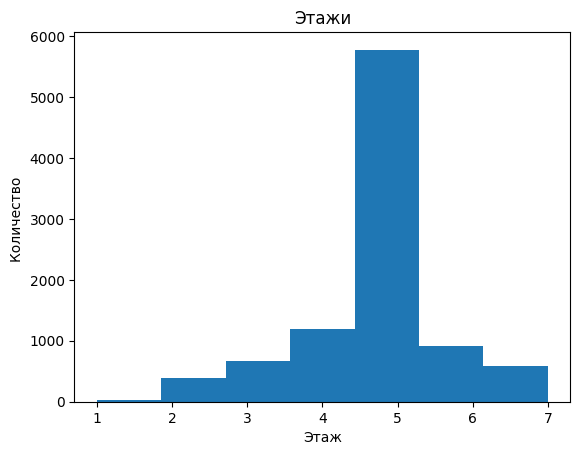

Этажность:
2253     60
16731    52
16934    37
5807     36
11079    36
397      36
13975    35
2966     35
9186     35
1917     35
Name: floors_total, dtype: Int8
count      23565.0
mean     10.675875
std       6.594823
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64


In [55]:

plt.hist(df['floors_total'], bins=7, range=(1,7))
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество ')
plt.show()
print('Этажность:')
print(df['floors_total'].sort_values(ascending=False).head(10))
print(df['floors_total'].describe())

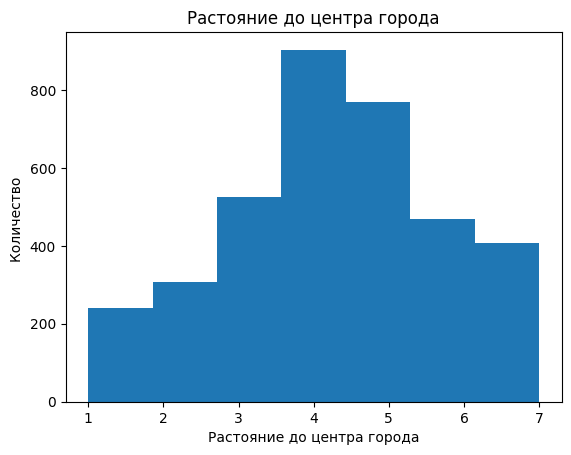

Наибольшее  растояние до центра города:
8        999999
23698    999999
12       999999
23692    999999
14760    999999
14761    999999
14763    999999
47       999999
30       999999
37       999999
Name: city_centers_nearest, dtype: int64
count     23565.000000
mean     233449.688394
std      423022.213340
min           0.000000
25%          10.000000
50%          14.000000
75%          35.000000
max      999999.000000
Name: city_centers_nearest, dtype: float64


In [56]:

plt.hist(df['city_centers_nearest'], bins=7, range=(1,7))
plt.title('Растояние до центра города')
plt.xlabel('Растояние до центра города')
plt.ylabel('Количество ')
plt.show()
print('Наибольшее  растояние до центра города:')
print(df['city_centers_nearest'].sort_values(ascending=False).head(10))
print(df['city_centers_nearest'].describe())

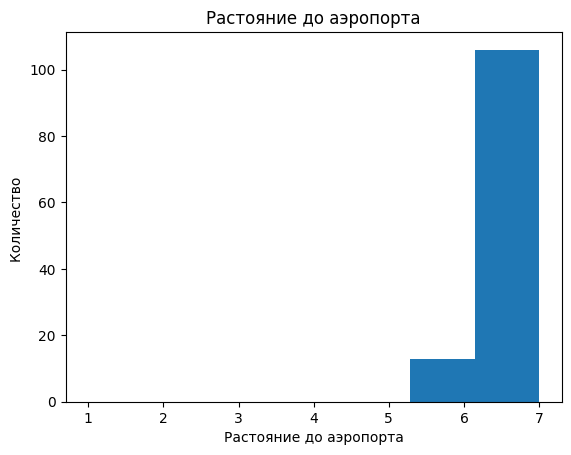

Наибольшее растояние до аэропорта:
23696    999999
6615     999999
6614     999999
6611     999999
6610     999999
6605     999999
6583     999999
6580     999999
6579     999999
6578     999999
Name: airports_nearest, dtype: int64
count     23565.000000
mean     234436.864375
std      423629.497058
min           0.000000
25%          21.000000
50%          33.000000
75%          54.000000
max      999999.000000
Name: airports_nearest, dtype: float64


In [57]:

plt.hist(df['airports_nearest'], bins=7, range=(1,7))
plt.title('Растояние до аэропорта')
plt.xlabel('Растояние до аэропорта')
plt.ylabel('Количество ')
plt.show()
print('Наибольшее растояние до аэропорта:')
print(df['airports_nearest'].sort_values(ascending=False).head(10))
print(df['airports_nearest'].describe())

В последних столбцах также нет анамальных значений или искажений.

Расмотрим день и месяц публикации

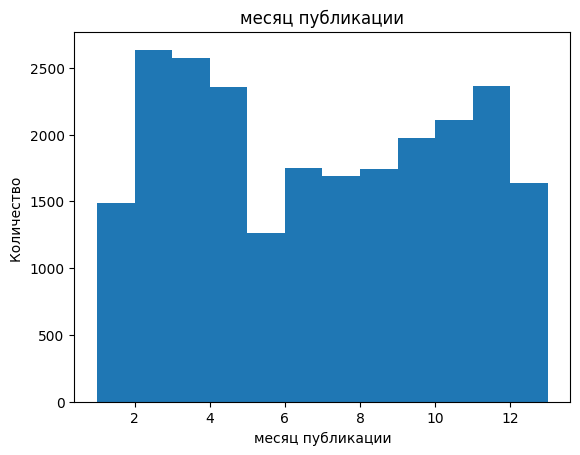

месяц публикации
count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64


In [58]:

plt.hist(df['month_exposition'], bins=12, range=(1,13))
plt.title('месяц публикации')
plt.xlabel('месяц публикации')
plt.ylabel('Количество ')
plt.show()
print('месяц публикации')

print(df['month_exposition'].describe())

Самые частые месяца февраль, март , апрель и далее идет всплеск осенью.

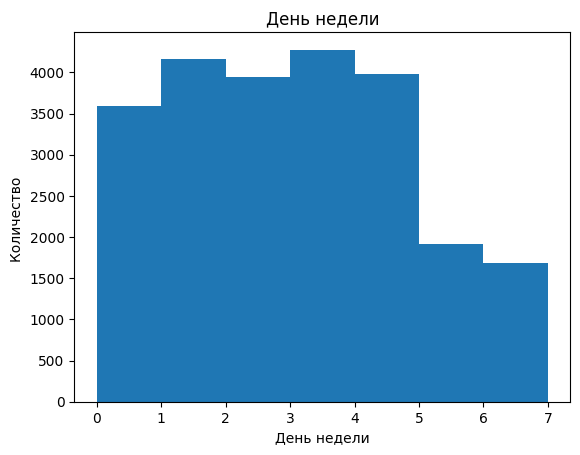

Самые часттые дни недели:
23696    6
23666    6
16252    6
7638     6
23653    6
32       6
34       6
7693     6
7696     6
7712     6
Name: weekday_exposition, dtype: int32
count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64


In [59]:

plt.hist(df['weekday_exposition'], bins=7, range=(0,7))
plt.title('День недели')
plt.xlabel('День недели')
plt.ylabel('Количество ')
plt.show()
print('Самые часттые дни недели:')
print(df['weekday_exposition'].sort_values(ascending=False).head(10))
print(df['weekday_exposition'].describe())

В основном пн и ср. - это дни в которые появляется наибольшее число объявлений

### Изучим как продаются квартиры

Среднее время продажи квартиры в днях: 103
Медианное время продажи квартиры в днях: 60

[Выбросы] Количество объявлений, которые сняты через:
45 дней: 879
60 дней: 538
90 дней: 200


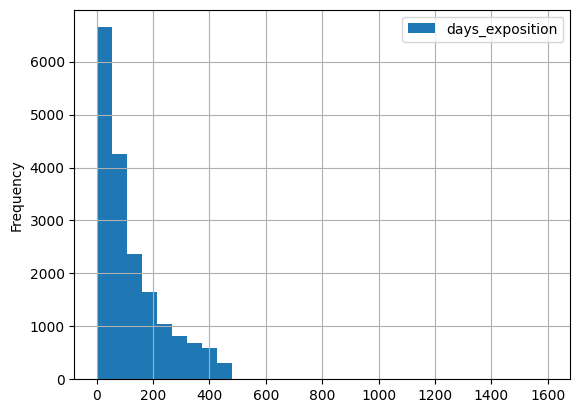

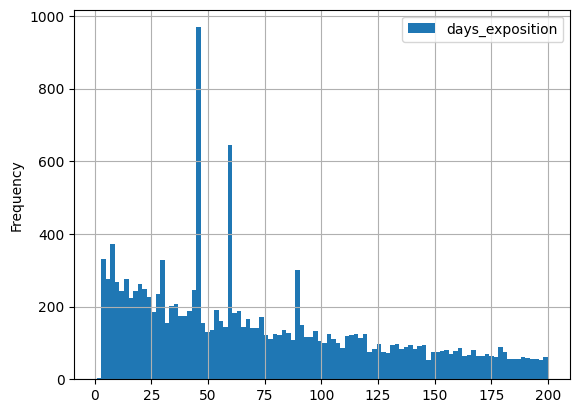

In [60]:

#диаграмма размаха
import matplotlib.pyplot as plt


df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()

print(f'Среднее время продажи квартиры в днях:',int(df['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(df['days_exposition'].median()))

print('\n[Выбросы] Количество объявлений, которые сняты через:')
print('45 дней:',df[df['days_exposition']==45]['days_exposition'].count())
print('60 дней:',df[df['days_exposition']==60]['days_exposition'].count())
print('90 дней:',df[df['days_exposition']==90]['days_exposition'].count())

Мы видим распределение Пуассона.  Сделав гистограмму со значениями от 0 до 200 , обнаружили на 7, 30, 45, 60,  90 днях - это наиболее популярное количество дней до снятия объявления.

Мы видим "длинный хвост" квартир, которые продавались очень долго.
 Выбросы похожи на платные объявлени с истекшим сроком размещения или работу ситемы удаления неактивных объявлений.

In [61]:
df['days_exposition'].describe()

,days_exposition
count,21539.000000
mean,103.573889
std,111.664697
min,0.000000
25%,18.000000
50%,60.000000
75%,153.000000
max,461.000000


Быстрыми продажи до 18 дней, а необычно долгими - свыше 153 дня.

# Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

In [62]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
total_images,1.000000,0.160000,0.130000,0.110000,-0.010000,0.010000,0.110000,0.030000,-0.030000,-0.020000,0.070000,0.050000,-0.060000,-0.060000,0.040000,0.010000,-0.020000,0.120000,-0.010000,0.000000,0.140000
last_price,0.160000,1.000000,0.690000,0.450000,0.000000,0.190000,0.570000,0.130000,-0.070000,-0.050000,0.510000,0.060000,-0.480000,-0.480000,0.260000,0.290000,0.000000,0.630000,-0.020000,0.010000,-0.000000
total_area,0.130000,0.690000,1.000000,0.790000,0.010000,-0.020000,0.910000,-0.020000,-0.110000,-0.070000,0.530000,0.060000,-0.140000,-0.140000,0.130000,0.160000,0.040000,-0.080000,-0.010000,0.010000,-0.060000
rooms,0.110000,0.450000,0.790000,1.000000,0.010000,-0.220000,0.870000,-0.150000,-0.160000,-0.100000,0.200000,-0.000000,-0.110000,-0.110000,0.140000,0.110000,0.040000,-0.230000,-0.000000,-0.000000,-0.060000
ceiling_height,-0.010000,0.000000,0.010000,0.010000,1.000000,-0.000000,0.010000,0.000000,-0.010000,-0.000000,0.010000,-0.000000,0.020000,0.020000,-0.010000,-0.010000,-0.010000,-0.010000,0.010000,0.000000,0.000000
floors_total,0.010000,0.190000,-0.020000,-0.220000,-0.000000,1.000000,-0.150000,0.680000,0.070000,0.050000,0.300000,0.170000,-0.140000,-0.140000,-0.160000,-0.050000,-0.010000,0.340000,0.010000,0.020000,0.010000
living_area,0.110000,0.570000,0.910000,0.870000,0.010000,-0.150000,1.000000,-0.110000,-0.070000,-0.040000,0.300000,0.030000,-0.130000,-0.130000,0.150000,0.140000,0.040000,-0.160000,-0.010000,0.000000,-0.050000
floor,0.030000,0.130000,-0.020000,-0.150000,0.000000,0.680000,-0.110000,1.000000,0.040000,0.040000,0.210000,0.170000,-0.090000,-0.090000,-0.100000,-0.030000,-0.010000,0.250000,0.010000,0.020000,0.010000
studio,-0.030000,-0.070000,-0.110000,-0.160000,-0.010000,0.070000,-0.070000,0.040000,1.000000,-0.000000,-0.120000,0.030000,0.030000,0.030000,-0.030000,-0.010000,-0.020000,0.050000,-0.000000,-0.000000,0.010000
open_plan,-0.020000,-0.050000,-0.070000,-0.100000,-0.000000,0.050000,-0.040000,0.040000,-0.000000,1.000000,-0.070000,0.030000,0.030000,0.030000,-0.020000,-0.000000,-0.010000,0.020000,0.010000,0.030000,-0.020000


In [63]:
corr = df[['total_area',\
           'last_price',\
           'days_exposition',\
           'city_centers_nearest',\
           'living_area',\
           'kitchen_area',\
           'weekday_exposition',\
           'rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,total_area,last_price,days_exposition,city_centers_nearest,living_area,kitchen_area,weekday_exposition,rooms
total_area,1.000000,0.694052,0.044545,-0.141365,0.909430,0.525348,-0.013318,0.788753
last_price,0.694052,1.000000,0.003994,-0.482440,0.573503,0.509638,-0.015812,0.448907
days_exposition,0.044545,0.003994,1.000000,-0.011376,0.038024,0.043544,-0.004998,0.038963
city_centers_nearest,-0.141365,-0.482440,-0.011376,1.000000,-0.127339,-0.119574,0.006503,-0.108095
living_area,0.909430,0.573503,0.038024,-0.127339,1.000000,0.301024,-0.007829,0.872027
kitchen_area,0.525348,0.509638,0.043544,-0.119574,0.301024,1.000000,-0.011669,0.199148
weekday_exposition,-0.013318,-0.015812,-0.004998,0.006503,-0.007829,-0.011669,1.000000,-0.002495
rooms,0.788753,0.448907,0.038963,-0.108095,0.872027,0.199148,-0.002495,1.000000


На стоимость квадратного метра квартиры сильнее всего влияет итоговая цена и количество комнат. Ну и отрицательная корреляция между стоимостью за квадрат и центром тоже имеет место быть.

np.float64(0.6940523107096924)

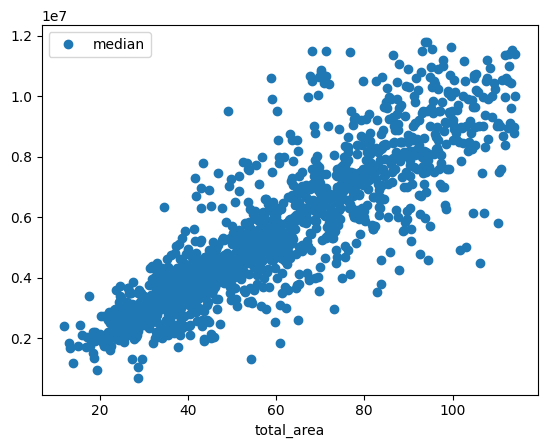

In [64]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['last_price'])

**Вывод. Диграмма рассеяния демонстрируем зависимость цены от площади. Кореляция равна 0,7 - сильная прямая зависимость. С ростом площади квартиры цена увеличивается.**

np.float64(-0.07767048060736884)

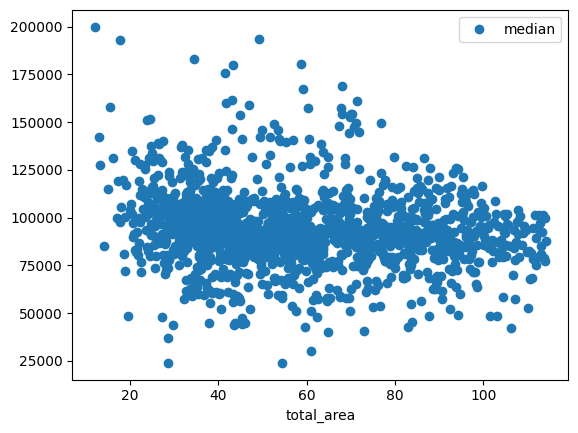

In [65]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['price_per_square_meter'])

Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.3! То есть, чем больше площадь тем немного выше стоимость!

np.float64(0.5735030445763263)

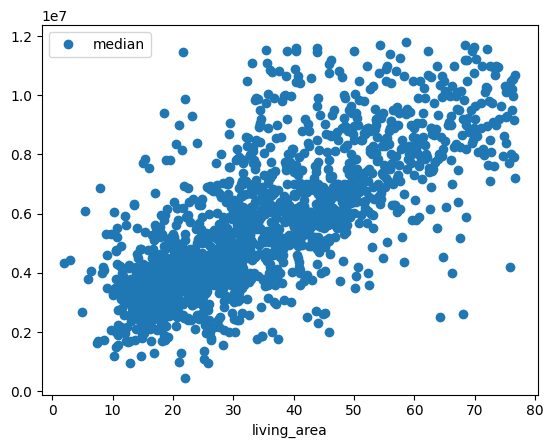

In [66]:
pivot_table_total_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['living_area'].corr(df['last_price'])

**Вывод. Диграмма рассеяния демонстрируем зависимость цены от площади. Кореляция равна 0,6 -  прямая зависимость. С ростом жилой площади квартиры цена увеличивается.**

np.float64(-0.15904108803516306)

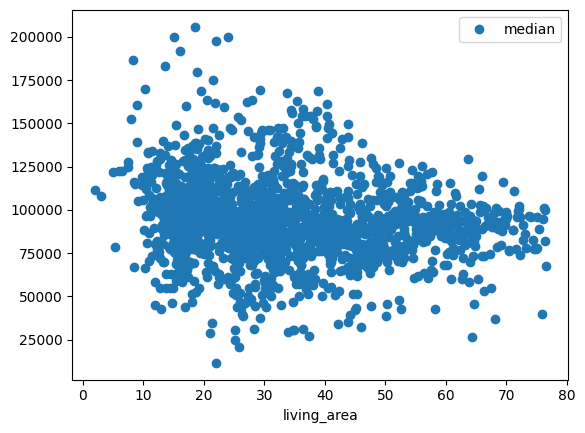

In [67]:
pivot_table_total_area = df.pivot_table(index = 'living_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['living_area'].corr(df['price_per_square_meter'])

Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.06

np.float64(0.5096379937193277)

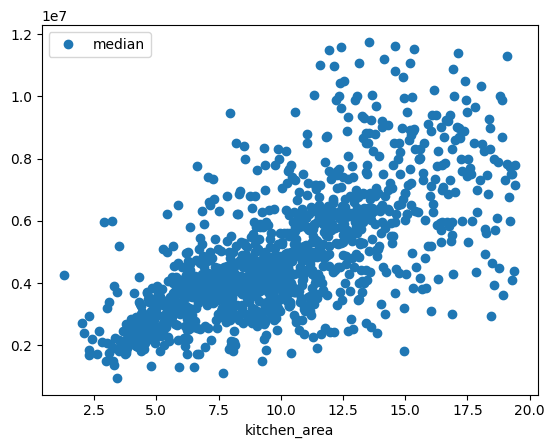

In [68]:
pivot_table_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['kitchen_area'].corr(df['last_price'])

**Вывод. Диграмма рассеяния демонстрируем зависимость цены от площади кухни. Кореляция равна 0,5 -  прямая зависимость. С ростом  площади кухни квартиры цена увеличивается.**

np.float64(0.19462170040897855)

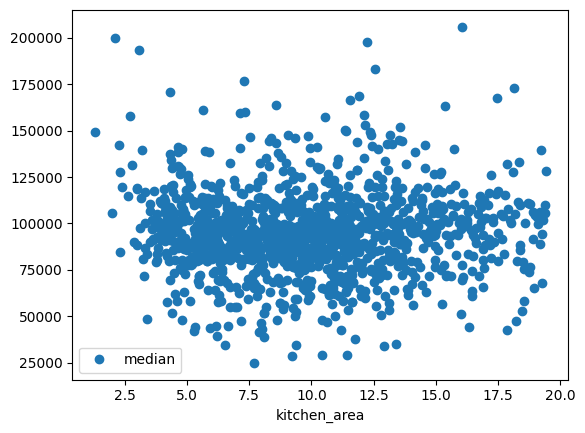

In [69]:
pivot_table_total_area = df.pivot_table(index = 'kitchen_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['kitchen_area'].corr(df['price_per_square_meter'])

Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.26

np.float64(0.4489073417026343)

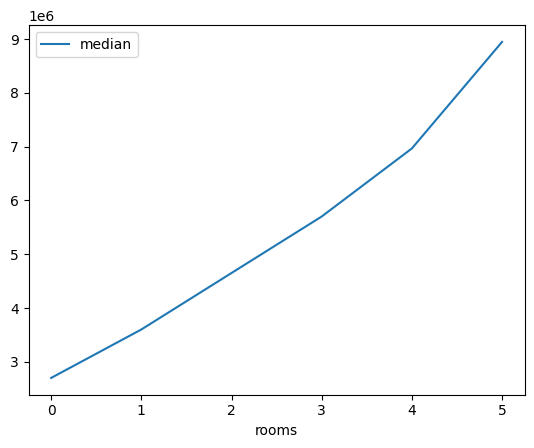

In [70]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['last_price'])

**Вывод. График демонстрируем зависимость цены от количества комнат. Кореляция равна 0,44 -  прямая зависимость. С ростом  количества комнат цена квартиры увеличивается.**

np.float64(-0.23121150255399012)

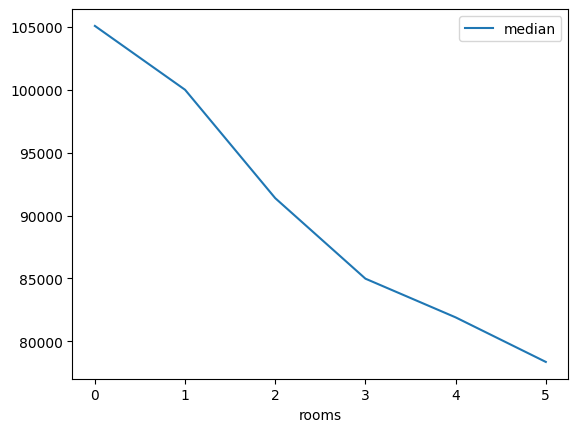

In [71]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['price_per_square_meter'])

Зависимость слабая

                        mean  count     median
floor_category                                
другой          5.031206e+06  15733  4590000.0
первый          4.125910e+06   2798  3800000.0
последний       4.481128e+06   2988  4000000.0


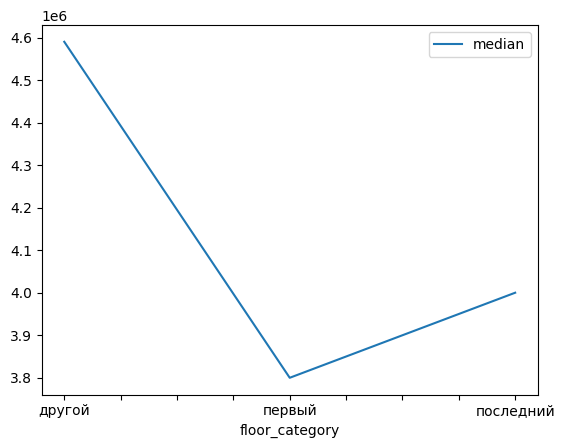

In [72]:
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
print(pivot_table_floor_category)




**Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.**

,mean,count,median
floor_category,,,
другой,96078.840471,15618,96081.367300
первый,78609.017875,2773,80275.229358
последний,83212.899204,2947,84615.384615


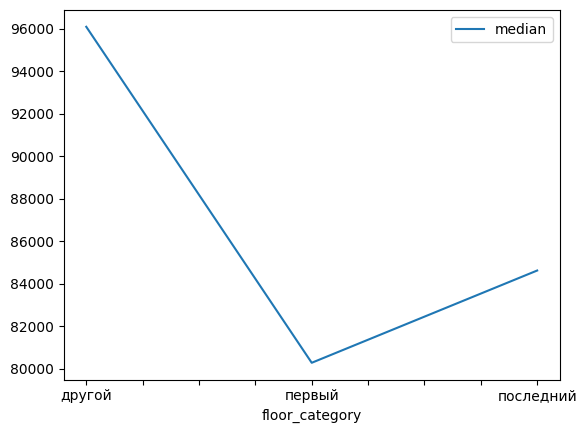

In [73]:
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

,mean,count,median
weekday_exposition,,,
1,4.896393e+06,3813,4499000.0
2,4.869844e+06,3589,4490000.0
0,4.837175e+06,3278,4400000.0
3,4.845655e+06,3852,4400000.0
5,4.729754e+06,1768,4400000.0
4,4.815482e+06,3664,4350000.0
6,4.767974e+06,1555,4350000.0


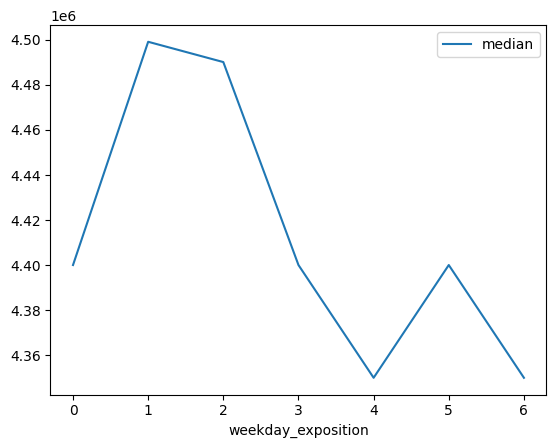

In [74]:
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая!**

**Скорее всего стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.**

,mean,count,median
weekday_exposition,,,
1,92663.633722,3772,93333.333333
2,92515.121160,3558,93333.333333
3,91787.497749,3824,92724.322502
0,91930.870062,3254,92485.138705
6,91660.278028,1540,92482.876712
4,92062.593842,3633,92424.242424
5,90674.928482,1757,91412.742382


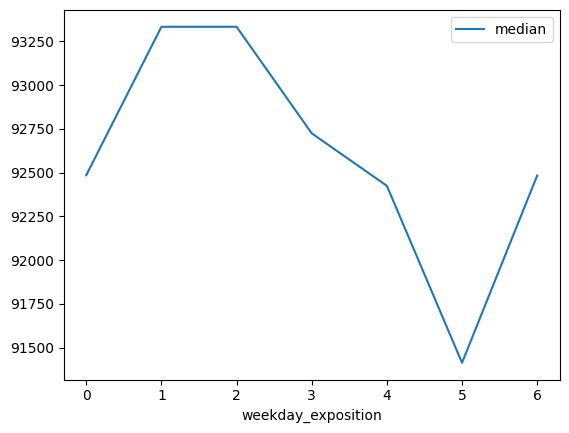

In [75]:
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая!

Скорее всего стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.

,mean,count,median
month_exposition,,,
4,4.943327e+06,2158,4552500.0
12,4.854752e+06,1494,4480000.0
11,4.865480e+06,2144,4455000.0
9,4.953425e+06,1793,4450000.0
3,4.796123e+06,2354,4400000.0
2,4.834506e+06,2411,4400000.0
1,4.792336e+06,1346,4400000.0
10,4.806094e+06,1938,4400000.0
8,4.837171e+06,1592,4380000.0


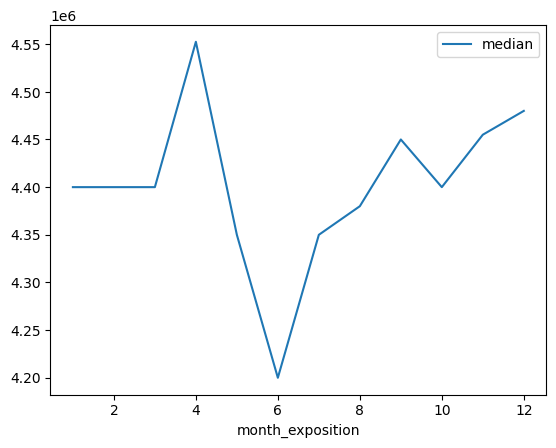

In [76]:
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**Cамая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.**

,mean,count,median
month_exposition,,,
4,93732.660567,2139,94444.444444
8,93002.794733,1579,94051.446945
9,93231.921210,1767,93412.204234
7,92161.602479,1515,93055.555556
2,91551.494906,2389,92982.456140
11,92070.286680,2127,92982.456140
1,91754.481516,1338,92760.032760
3,92114.230574,2338,92739.733709
10,91602.542540,1929,92307.692308


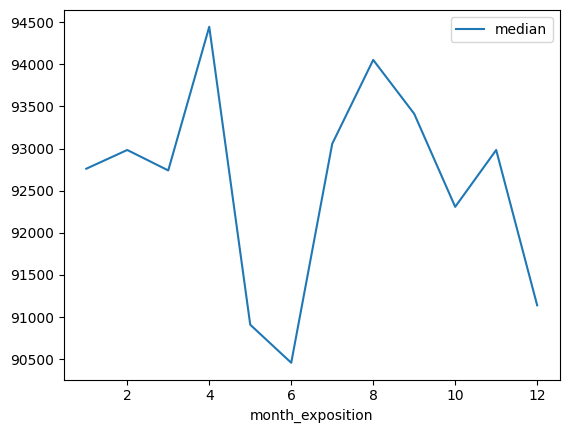

In [77]:
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Cамая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.

,mean,count,median
year_exposition,,,
2014,5.782435e+06,89,5500000.0
2015,5.238065e+06,994,4885000.0
2019,5.095495e+06,2604,4800000.0
2018,4.773183e+06,7883,4390000.0
2016,4.792287e+06,2483,4300000.0
2017,4.764757e+06,7466,4299000.0


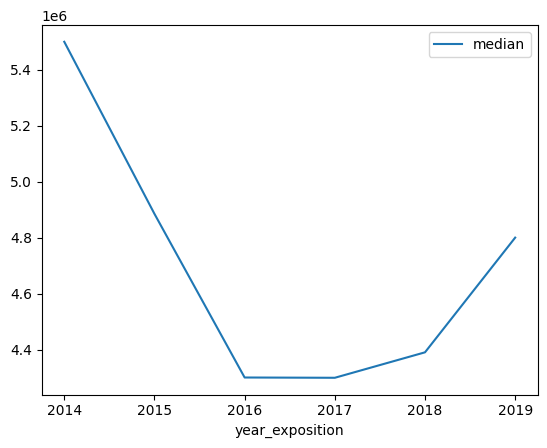

In [78]:
pivot_table_month_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**C 2014 до 2016 года цена падала, а после 2016 мы наблюдаем рост цен.**

,mean,count,median
year_exposition,,,
2019,98961.604104,2594,101089.926348
2014,95784.458592,86,95755.517827
2018,92321.732919,7829,94067.796610
2015,90885.734001,976,90309.343434
2017,90263.520405,7409,90202.177294
2016,89432.463347,2444,89553.230881


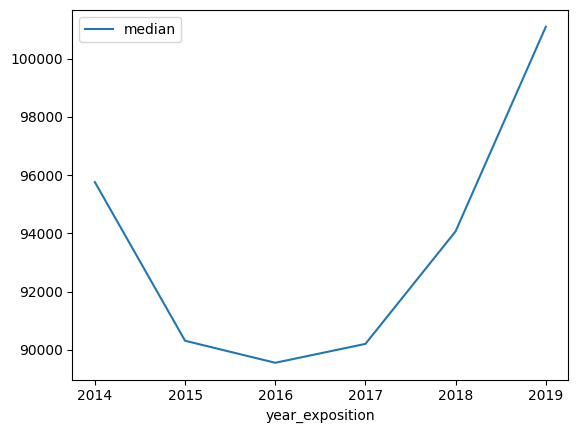

In [79]:
pivot_table_month_exposition = df.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,65.603592,103,63.60
2015,59.524390,1041,56.80
2016,55.040901,2564,51.00
2019,53.888890,2738,50.60
2017,54.358313,7729,50.00
2018,53.393645,8151,49.44


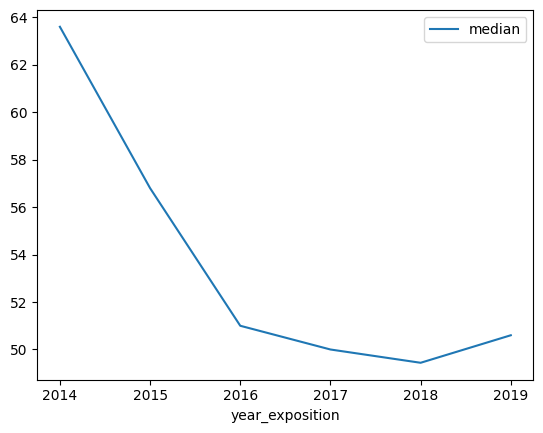

In [80]:
pivot_table_month_exposition = df.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**C 2014 до 2016 года цена падала, а после 2016 мы наблюдаем рост цен.**

# Топ -10

In [81]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)
#самая высокая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])


                   count           mean
locality_name                          
санкт-петербург    13546  105686.252560
поселок мурино       552   85629.568678
поселок шушары       436   78578.068204
всеволожск           394   67222.431462
пушкин               336  100462.063435
колпино              335   75221.876295
поселок парголово    326   90332.263023
гатчина              303   68664.035870
деревня кудрово      298   92409.726322
выборг               228   58225.624357
                 count          mean
locality_name                       
санкт-петербург  13546  105686.25256
               count          mean
locality_name                     
выборг           228  58225.624357


Cамая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

,price_per_square_meter
city_centers_nearest,
0,123870.110674
1,118617.393290
2,114140.059975
3,111305.059705
4,120323.080346
5,121464.256405
6,119538.890067
7,117948.169268
8,111952.996013


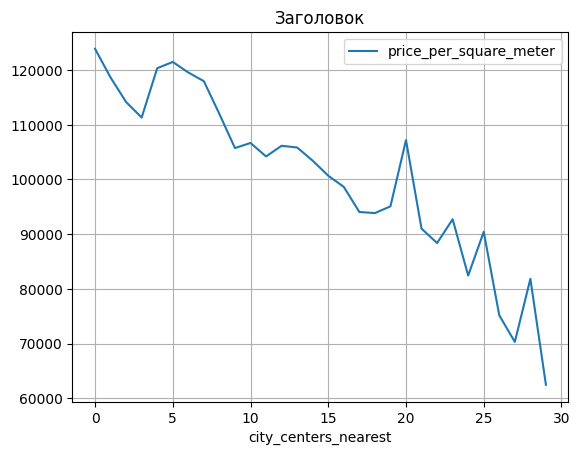

In [82]:


pivot_table_km = df.query('locality_name == "санкт-петербург"and city_centers_nearest!=999999').pivot_table(index = 'city_centers_nearest', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot(grid = True, title = 'Заголовок')
pivot_table_km

чем ближе центр тем больше стоимость квартиры

### Общий вывод

Мы обработали данные - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы.
Посчитали и добавили в таблицу цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Были определены аномалии в данных параметрах.Убрали выбросы.

Провели исследовательский анализ данных.

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.

Дороже всего квадратный метр в Санкт-Петербурге.Дешевле всего квадратный метр в Выборг.
Цена недвижимости зависит от удаленности от центра

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

In [83]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

In [84]:
inputs = df


In [85]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23565 non-null  int64         
 1   last_price              21519 non-null  float64       
 2   total_area              22326 non-null  float64       
 3   first_day_exposition    23565 non-null  datetime64[ns]
 4   rooms                   23371 non-null  float64       
 5   ceiling_height          21374 non-null  float64       
 6   floors_total            23565 non-null  Int8          
 7   living_area             22682 non-null  float64       
 8   floor                   23565 non-null  int64         
 9   studio                  23565 non-null  bool          
 10  open_plan               23565 non-null  bool          
 11  kitchen_area            22250 non-null  float64       
 12  balcony                 23565 non-null  int64      

In [86]:
inputs = inputs.drop(['floor_category'], axis = 1)
inputs = inputs.drop(['first_day_exposition'], axis = 1)
inputs = inputs.drop(['studio'], axis = 1)
inputs = inputs.drop(['open_plan'], axis = 1)
inputs = inputs.drop(['locality_name'], axis = 1)

In [87]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23565 non-null  int64  
 1   last_price              21519 non-null  float64
 2   total_area              22326 non-null  float64
 3   rooms                   23371 non-null  float64
 4   ceiling_height          21374 non-null  float64
 5   floors_total            23565 non-null  Int8   
 6   living_area             22682 non-null  float64
 7   floor                   23565 non-null  int64  
 8   kitchen_area            22250 non-null  float64
 9   balcony                 23565 non-null  int64  
 10  airports_nearest        23565 non-null  int64  
 11  city_centers_nearest    23565 non-null  int64  
 12  parks_around3000        23565 non-null  int64  
 13  ponds_around3000        23565 non-null  int64  
 14  days_exposition         21539 non-null  flo

In [88]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23565 non-null  int64  
 1   last_price              21519 non-null  float64
 2   total_area              22326 non-null  float64
 3   rooms                   23371 non-null  float64
 4   ceiling_height          21374 non-null  float64
 5   floors_total            23565 non-null  Int8   
 6   living_area             22682 non-null  float64
 7   floor                   23565 non-null  int64  
 8   kitchen_area            22250 non-null  float64
 9   balcony                 23565 non-null  int64  
 10  airports_nearest        23565 non-null  int64  
 11  city_centers_nearest    23565 non-null  int64  
 12  parks_around3000        23565 non-null  int64  
 13  ponds_around3000        23565 non-null  int64  
 14  days_exposition         21539 non-null  flo

In [89]:
inputs = inputs.dropna()


In [90]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17442 entries, 6 to 23564
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            17442 non-null  int64  
 1   last_price              17442 non-null  float64
 2   total_area              17442 non-null  float64
 3   rooms                   17442 non-null  float64
 4   ceiling_height          17442 non-null  float64
 5   floors_total            17442 non-null  Int8   
 6   living_area             17442 non-null  float64
 7   floor                   17442 non-null  int64  
 8   kitchen_area            17442 non-null  float64
 9   balcony                 17442 non-null  int64  
 10  airports_nearest        17442 non-null  int64  
 11  city_centers_nearest    17442 non-null  int64  
 12  parks_around3000        17442 non-null  int64  
 13  ponds_around3000        17442 non-null  int64  
 14  days_exposition         17442 non-null  flo

In [91]:

target = inputs['last_price']

In [92]:
https://colab.research.google.com/drive/1o3SFaGFO88l119_HNNCO5hPkV8_106S0?usp=sharing= inputs.drop(['last_price'], axis = 1)

SyntaxError: invalid decimal literal (ipython-input-92-2107205311.py, line 1)

In [93]:
target

,last_price
6,3700000.0
20,6120000.0
21,3200000.0
22,5000000.0
25,6800000.0
...,...
23557,3800000.0
23560,5700000.0
23561,2300000.0
23562,2500000.0


In [94]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17442 entries, 6 to 23564
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            17442 non-null  int64  
 1   last_price              17442 non-null  float64
 2   total_area              17442 non-null  float64
 3   rooms                   17442 non-null  float64
 4   ceiling_height          17442 non-null  float64
 5   floors_total            17442 non-null  Int8   
 6   living_area             17442 non-null  float64
 7   floor                   17442 non-null  int64  
 8   kitchen_area            17442 non-null  float64
 9   balcony                 17442 non-null  int64  
 10  airports_nearest        17442 non-null  int64  
 11  city_centers_nearest    17442 non-null  int64  
 12  parks_around3000        17442 non-null  int64  
 13  ponds_around3000        17442 non-null  int64  
 14  days_exposition         17442 non-null  flo

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                  )

In [96]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model

LinearRegression()

In [97]:
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [98]:
from sklearn import linear_model, ensemble

In [99]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model

RandomForestRegressor()

In [100]:
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [101]:
test_predictions_linear = linear_regression_model.predict(x_test)
test_predictions_random_forest = random_forest_model.predict(x_test)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [103]:
mean_absolute_error_linear_model = mean_absolute_error(y_test, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(y_test, test_predictions_linear)

In [104]:
mean_absolute_error_random_forest_model = mean_absolute_error(y_test, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(y_test, test_predictions_random_forest)

In [105]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

MAE:    0.00, RMSE:    0.00 для модели линейной регрессии
MAE:  575.95, RMSE: 1926.06 для модели случайного леса
